In [13]:
import pandas as pd
import nltk
import numpy as np
data_bef_Aug_2017 = pd.read_csv("Hotel_Reviews.csv")
data_later = pd.read_csv('Hilton London Canary Wharf.csv')

In [14]:
import string

# Clean up the date in the "Review_date"
data_later.Review_date = data_later.Review_date.apply(lambda x: x.replace('Reviewed: ',''))
data_later.head()

,Unnamed: 0,Name,Country,Room_stayed,Date_stayed,Trip_type,Review_date,Review_title,Positive,Negative,Reviewer_score
0,0,Klára,Czech Republic,Deluxe King Room,2 nights · October 2019,Couple,20 October 2019,Exceptional,"Everything, breakfast, clean rooms and locatio...",Everything was perfect!,10
1,1,Simon,United Kingdom,Double Guest Room,2 nights · March 2021,Solo traveller,17 March 2021,Hilton Canary Wharf,Staff were excellent given the current lockdow...,All facilities were closed due to lockdown res...,8.0
2,2,Michael,United Kingdom,Executive King Room,2 nights · February 2021,Family,21 February 2021,"Nice room, bed supercomfortable. Obviously any...",We like this hotel and have stayed here before...,Breakfast - brought to rooms because of the pa...,8.0
3,3,Zainab,United Kingdom,King Junior Suite,2 nights · December 2020,Couple,17 January 2021,Exceptional,The staff were very friendly... they went abov...,The breakfast was not worth the price,10
4,4,Aranjones,United Kingdom,King Junior Suite,2 nights · January 2021,Solo traveller,14 January 2021,Exceptional,"Excellent safety precautions, superb room, ver...","It's not the fanciest part of town, but for a ...",10


In [15]:
data_later.describe()

,Unnamed: 0
count,2952.000000
mean,1475.500000
std,852.313323
min,0.000000
25%,737.750000
50%,1475.500000
75%,2213.250000
max,2951.000000


In [16]:
data_later.isnull().sum()

Unnamed: 0          0
Name                0
Country             0
Room_stayed         0
Date_stayed         0
Trip_type           0
Review_date         0
Review_title        0
Positive            2
Negative          276
Reviewer_score      0
dtype: int64

In [17]:
data_later[data_later.Review_date=='Not Available'].index

Int64Index([666, 1110, 1180, 1181], dtype='int64')

In [18]:
# Where date is not available, use the neighbouring cell's value (likely the review was provided around the same time)
not_avail_index = data_later[data_later.Review_date=='Not Available'].index
not_avail_index
print(f"Number of Not Available before cleaning: {len(not_avail_index)}")

for i in range(2): # I set this to do 2 loops because I know from the data that 2 loops are required
    # There are 48 rows with Review_date as 'Not Available' - not a lot of rows. So just drop them.
    def repl_not_avail(own_index):
        data_later.loc[own_index, 'Review_date'] = data_later.loc[own_index+1, 'Review_date']

    for i in not_avail_index:
        repl_not_avail(i)

Number of Not Available before cleaning: 4


In [19]:
# Replaced all 'Not Available' in the Review_date
print(f"Number of Not Available left after cleaning: {len(data_later[data_later.Review_date=='Not Available'])}")

Number of Not Available left after cleaning: 0


In [20]:
# # Test
i = 0
index = not_avail_index[i]
print(data_later.loc[index-1, 'Review_date'])
print(f"{(data_later.loc[index, 'Review_date'])} <--- previously 'Not Available'")
print(data_later.loc[index+1, 'Review_date'])
print()

4 April 2019
31 March 2019 <--- previously 'Not Available'
31 March 2019



Write a function to convert date strings into proper date time format

In [21]:
from datetime import datetime

def string2date(string):
    return pd.to_datetime(datetime.strptime(string, '%d %B %Y'))

data_later.Review_date = data_later.Review_date.apply(string2date)

In [22]:
data_later.head()

,Unnamed: 0,Name,Country,Room_stayed,Date_stayed,Trip_type,Review_date,Review_title,Positive,Negative,Reviewer_score
0,0,Klára,Czech Republic,Deluxe King Room,2 nights · October 2019,Couple,2019-10-20,Exceptional,"Everything, breakfast, clean rooms and locatio...",Everything was perfect!,10
1,1,Simon,United Kingdom,Double Guest Room,2 nights · March 2021,Solo traveller,2021-03-17,Hilton Canary Wharf,Staff were excellent given the current lockdow...,All facilities were closed due to lockdown res...,8.0
2,2,Michael,United Kingdom,Executive King Room,2 nights · February 2021,Family,2021-02-21,"Nice room, bed supercomfortable. Obviously any...",We like this hotel and have stayed here before...,Breakfast - brought to rooms because of the pa...,8.0
3,3,Zainab,United Kingdom,King Junior Suite,2 nights · December 2020,Couple,2021-01-17,Exceptional,The staff were very friendly... they went abov...,The breakfast was not worth the price,10
4,4,Aranjones,United Kingdom,King Junior Suite,2 nights · January 2021,Solo traveller,2021-01-14,Exceptional,"Excellent safety precautions, superb room, ver...","It's not the fanciest part of town, but for a ...",10


Cleaning the scraped dataset

In [23]:
later_data_original = data_later[['Review_date', 'Country', 'Positive', 'Negative', 'Trip_type']].copy()

later_data_original['Year'] = later_data_original['Review_date'].dt.year
later_data_original.head()

,Review_date,Country,Positive,Negative,Trip_type,Year
0,2019-10-20,Czech Republic,"Everything, breakfast, clean rooms and locatio...",Everything was perfect!,Couple,2019
1,2021-03-17,United Kingdom,Staff were excellent given the current lockdow...,All facilities were closed due to lockdown res...,Solo traveller,2021
2,2021-02-21,United Kingdom,We like this hotel and have stayed here before...,Breakfast - brought to rooms because of the pa...,Family,2021
3,2021-01-17,United Kingdom,The staff were very friendly... they went abov...,The breakfast was not worth the price,Couple,2021
4,2021-01-14,United Kingdom,"Excellent safety precautions, superb room, ver...","It's not the fanciest part of town, but for a ...",Solo traveller,2021


In [24]:
# Find out the review with the latest date in our own scraped data
np.min(later_data_original.Review_date)

Timestamp('2018-07-31 00:00:00')

In [27]:
# Find out the review with the latest date in our own scraped data
np.max(later_data_original.Review_date)

Timestamp('2021-03-17 00:00:00')

In [28]:
corrected_headers_dict = {
    'Review_date' : 'Review_Date',
    'Country' : 'Reviewer_Nationality',
    'Positive' : 'Positive_Review',
    'Negative' : 'Negative_Review',
    'Trip_type' : 'Guest_type'
}

later_data_original.rename(columns=corrected_headers_dict, inplace=True)
later_data_original.head()

,Review_Date,Reviewer_Nationality,Positive_Review,Negative_Review,Guest_type,Year
0,2019-10-20,Czech Republic,"Everything, breakfast, clean rooms and locatio...",Everything was perfect!,Couple,2019
1,2021-03-17,United Kingdom,Staff were excellent given the current lockdow...,All facilities were closed due to lockdown res...,Solo traveller,2021
2,2021-02-21,United Kingdom,We like this hotel and have stayed here before...,Breakfast - brought to rooms because of the pa...,Family,2021
3,2021-01-17,United Kingdom,The staff were very friendly... they went abov...,The breakfast was not worth the price,Couple,2021
4,2021-01-14,United Kingdom,"Excellent safety precautions, superb room, ver...","It's not the fanciest part of town, but for a ...",Solo traveller,2021


In [29]:
later_data_original.Guest_type.value_counts()

Couple            1249
Family             665
Not Available      385
Group              328
Solo traveller     325
Name: Guest_type, dtype: int64

Filter out our chosen hotel

In [30]:
hotel_hilton = data_bef_Aug_2017[data_bef_Aug_2017.Hotel_Name == 'Hilton London Canary Wharf']
hotel_hilton.reset_index(inplace = True, drop = True)
hotel_hilton = hotel_hilton[['Review_Date', 'Reviewer_Nationality', 'Positive_Review', 'Negative_Review', 'Tags']].copy()
hotel_hilton.Review_Date = pd.to_datetime(hotel_hilton.Review_Date)

hotel_hilton['Year'] = hotel_hilton['Review_Date'].dt.year

hotel_hilton.head()

,Review_Date,Reviewer_Nationality,Positive_Review,Negative_Review,Tags,Year
0,2016-11-14,United Kingdom,Everything,No Negative,"[' Leisure trip ', ' Couple ', ' Double Guest ...",2016
1,2016-11-14,United Kingdom,bed was great the room was really clean and t...,No Negative,"[' Leisure trip ', ' Couple ', ' Double Guest ...",2016
2,2016-11-14,United Kingdom,The staff were amazing the room was spacious ...,No Negative,"[' Leisure trip ', ' Family with young childre...",2016
3,2016-11-13,United Kingdom,It was just what I expected and the standard ...,5 50 for a bottle of water in room,"[' Leisure trip ', ' Couple ', ' Double Guest ...",2016
4,2016-11-13,Ireland,Staff exceptionally friendly and helpful,The bed,"[' Business trip ', ' Solo traveler ', ' Twin ...",2016


In [31]:
# Creating features from the tags column
import ast
hotel_hilton['Travel_type'] = hotel_hilton.Tags.apply(lambda x: ast.literal_eval(x)[0])
hotel_hilton['Guest_type'] = hotel_hilton.Tags.apply(lambda x: ast.literal_eval(x)[1] if len(ast.literal_eval(x)) > 1 else None)
hotel_hilton['Room_type'] = hotel_hilton.Tags.apply(lambda x: ast.literal_eval(x)[2] if len(ast.literal_eval(x)) > 2 else None)
hotel_hilton['Stay'] = hotel_hilton.Tags.apply(lambda x: ast.literal_eval(x)[3] if len(ast.literal_eval(x)) > 3 else None)
hotel_hilton.head()

,Review_Date,Reviewer_Nationality,Positive_Review,Negative_Review,Tags,Year,Travel_type,Guest_type,Room_type,Stay
0,2016-11-14,United Kingdom,Everything,No Negative,"[' Leisure trip ', ' Couple ', ' Double Guest ...",2016,Leisure trip,Couple,Double Guest Room,Stayed 1 night
1,2016-11-14,United Kingdom,bed was great the room was really clean and t...,No Negative,"[' Leisure trip ', ' Couple ', ' Double Guest ...",2016,Leisure trip,Couple,Double Guest Room,Stayed 2 nights
2,2016-11-14,United Kingdom,The staff were amazing the room was spacious ...,No Negative,"[' Leisure trip ', ' Family with young childre...",2016,Leisure trip,Family with young children,Family Room,Stayed 1 night
3,2016-11-13,United Kingdom,It was just what I expected and the standard ...,5 50 for a bottle of water in room,"[' Leisure trip ', ' Couple ', ' Double Guest ...",2016,Leisure trip,Couple,Double Guest Room,Stayed 1 night
4,2016-11-13,Ireland,Staff exceptionally friendly and helpful,The bed,"[' Business trip ', ' Solo traveler ', ' Twin ...",2016,Business trip,Solo traveler,Twin Deluxe Room,Stayed 4 nights


In [32]:
# Concatenate the reviews from Kaggle with the one we scraped ourselves
full_df_hilton = pd.concat([hotel_hilton, later_data_original], axis=0, sort=False, ignore_index=True)
full_df_hilton.head()

,Review_Date,Reviewer_Nationality,Positive_Review,Negative_Review,Tags,Year,Travel_type,Guest_type,Room_type,Stay
0,2016-11-14,United Kingdom,Everything,No Negative,"[' Leisure trip ', ' Couple ', ' Double Guest ...",2016,Leisure trip,Couple,Double Guest Room,Stayed 1 night
1,2016-11-14,United Kingdom,bed was great the room was really clean and t...,No Negative,"[' Leisure trip ', ' Couple ', ' Double Guest ...",2016,Leisure trip,Couple,Double Guest Room,Stayed 2 nights
2,2016-11-14,United Kingdom,The staff were amazing the room was spacious ...,No Negative,"[' Leisure trip ', ' Family with young childre...",2016,Leisure trip,Family with young children,Family Room,Stayed 1 night
3,2016-11-13,United Kingdom,It was just what I expected and the standard ...,5 50 for a bottle of water in room,"[' Leisure trip ', ' Couple ', ' Double Guest ...",2016,Leisure trip,Couple,Double Guest Room,Stayed 1 night
4,2016-11-13,Ireland,Staff exceptionally friendly and helpful,The bed,"[' Business trip ', ' Solo traveler ', ' Twin ...",2016,Business trip,Solo traveler,Twin Deluxe Room,Stayed 4 nights


In [33]:
# Test to see that the later (self-scraped) dataset has been concatenated
full_df_hilton[full_df_hilton.Review_Date>'2019-08-01']

,Review_Date,Reviewer_Nationality,Positive_Review,Negative_Review,Tags,Year,Travel_type,Guest_type,Room_type,Stay
1541,2019-10-20,Czech Republic,"Everything, breakfast, clean rooms and locatio...",Everything was perfect!,NaN,2019,NaN,Couple,NaN,NaN
1542,2021-03-17,United Kingdom,Staff were excellent given the current lockdow...,All facilities were closed due to lockdown res...,NaN,2021,NaN,Solo traveller,NaN,NaN
1543,2021-02-21,United Kingdom,We like this hotel and have stayed here before...,Breakfast - brought to rooms because of the pa...,NaN,2021,NaN,Family,NaN,NaN
1544,2021-01-17,United Kingdom,The staff were very friendly... they went abov...,The breakfast was not worth the price,NaN,2021,NaN,Couple,NaN,NaN
1545,2021-01-14,United Kingdom,"Excellent safety precautions, superb room, ver...","It's not the fanciest part of town, but for a ...",NaN,2021,NaN,Solo traveller,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
4455,2019-08-13,South Korea,There are no comments available for this review,Not Available,NaN,2019,NaN,Not Available,NaN,NaN
4486,2020-02-07,Spain,There are no comments available for this review,Not Available,NaN,2020,NaN,Not Available,NaN,NaN
4487,2020-02-01,Italy,There are no comments available for this review,Not Available,NaN,2020,NaN,Not Available,NaN,NaN
4488,2019-12-30,Spain,There are no comments available for this review,Not Available,NaN,2019,NaN,Not Available,NaN,NaN


In [34]:
hotel = full_df_hilton.copy()

After preparing the dataset, it's time to clean the reviews.

In [35]:
hotel.isnull().sum()

Review_Date                0
Reviewer_Nationality       0
Positive_Review            2
Negative_Review          276
Tags                    2952
Year                       0
Travel_type             2952
Guest_type                 0
Room_type               2953
Stay                    2961
dtype: int64

In [36]:
hotel.Positive_Review.fillna('N', inplace=True) # Fill missing values with 'N', a single-letter word, so that it can
# be cleaned away later.
hotel.Positive_Review.isnull().sum()

0

In [37]:
for i in hotel.Positive_Review.value_counts().index:
    print(i)
# We can see that there are some words that are not really review and may skew our analyses. We clean them by
# replacing them with single letter values which will be cleaned away during our text pre-processing later. They are:
## There are no comments available for this review  
## This review is hidden because it doesn't meet our guidelines. 

There are no comments available for this review
No Positive
Everything
Location
 Everything
 Location
 Comfy bed
This review has been hidden because it doesn't meet our guidelines.
 Breakfast
Staff were very friendly
 everything
Location and staff
 The bed was comfy
Breakfast was excellent
Location and cleanliness
N
 Very helpful staff
locatie
Everything was excellent
 The bed
Good location
 Friendly staff
Excellent location
Breakfast
Nothing
Very good
 Excellent location 
 Good location
Comfortable
 Breakfast excellent Large room Comfortable beds 
 Everything was great early check in room was big and clean bathroom was very spacious and nice with extra towels if needed
Nice location, quiet room with large area.
Sauna during winter months is a must!
The hotel itself was great - clean and efficient service and a lovely treat for me and my partner who were upgraded to an executive suite! It was a lovely quite room with a nice view of the skyline. Breakfast in bed was delivered on time an

location
Lovely hotel with very helpful and friendly staff ,would definitely stay again.
The guy in the front desk was so helpful. His name is Abby. He was excellent to welcome us, he took our luggage to the room as well on checking out, he was helpful. He organised a taxi to take us to Heathrow Airport. Thumbs up to this guy. He is passionate about his job.
 Breakfast was plentiful catering for all tastes Location is good for Canary Wharf stations 
 English and continental breakfast comfortable bed good services to the city centre DLR and Jubilee line 
Breakfast was okay.
Great location for the O2 and plenty of places to eat.
 Staff went above and beyond to ensure we had a nice stay can t thank them enough 
 Staff exceptionally friendly and helpful
Great staff and super location.
 bed was lovely separate shower and bath and the staff were great Overall im very happy D
The cost of the breakfast...my son paid £41 for 2 buffet breakfasts, not good value very overpriced
Staff were marvell

In [38]:
positive_rev_replace = {
    'There are no comments available for this review' : 'N',
    "This review has been hidden because it doesn't meet our guidelines." : "N"    
}

hotel.Positive_Review.replace(to_replace=positive_rev_replace, inplace=True)
hotel.Positive_Review.value_counts()

N                                                                                                                                    1366
No Positive                                                                                                                            77
Everything                                                                                                                             23
Location                                                                                                                               14
 Everything                                                                                                                            10
                                                                                                                                     ... 
 Bed and room amazing Extremely friendly staff                                                                                          1
Very clean spacious and comfortabl

Now, on to cleaning the Negative Reviews

In [39]:
hotel.Negative_Review.isnull().sum()

276

In [40]:
hotel.Negative_Review.fillna('N', inplace=True) # Fill missing values with 'N', a single-letter word, so that it can
# be cleaned away later.
hotel.Negative_Review.isnull().sum()

0

In [41]:
for item in hotel.Negative_Review.value_counts().index:
    print(item)

# Again, we need to pick out those that may skew our analyses. They are:
## Not Available
## N/a
##  N A
## Na
## 
## -
## Na
## .
##  N a
##  n a
##  Na
## ....

Not Available
No Negative
N
Nothing
 Nothing
 Nothing 
 nothing
Nothing.
 N A
N/a
Nothing!
 Nothing really
nothing
Na
 None
Price
Nothing 😀
 Cost of parking
Nothing :)
 Everything was great
Couldn’t fault anything
 No issues
Everything was perfect.
Nothing..
Nithing
Nothing not to like.
Good
 There was nothing not to like 
 No complaints
No complaints.
Nothing really
 Check in was slow
 No swimming pool 
 Prosecco was a bit expensive
 Not impressed with reception staff and management I booked a twin room and a double for 3 nights My colleague and her father arrived first and were told that they could not check in because I had made the booking My friend had a copy of the reservation emailed from me and her father was the named guest on the booking for the double room Both offered to provide their credit cards to guarantee the rooms but they said it was against their security policy My friend contacted me whilst I was on the train to see if I could do anything as her father a pensioner 

In [42]:
negative_rev_replace = {
    'Not Available' : 'N',
    "N/a" : "N",
    "-" : "N",
    "Na" : "N",
    " N a" : "N",
    " n a" : "N", 
    " Na" : "N",
    "...." : "N",
    " N A" : "N"  
}

hotel.Negative_Review.replace(to_replace=negative_rev_replace, inplace=True)
hotel.Negative_Review.value_counts()

N                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [43]:
hotel.isnull().sum()
# All nulls for the reviews have been treated. Now we can build WordCloud.

Review_Date                0
Reviewer_Nationality       0
Positive_Review            0
Negative_Review            0
Tags                    2952
Year                       0
Travel_type             2952
Guest_type                 0
Room_type               2953
Stay                    2961
dtype: int64

Transform reviews into corpus

In [44]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer() 
stop_english = stopwords.words('english')
hotel['clean_positive_review'] = hotel['Positive_Review'].apply(lambda x: list(x.split(' ')))
# Remove stop words and single character
hotel['clean_positive_review'] = hotel['clean_positive_review'].apply(lambda x: [w.lower() for w in x if w.lower() not in stop_english and len(w) >=2])
# positive_review Normalization: [am, is, are] -> be
hotel['stemed_clean_positive_review'] = hotel['clean_positive_review'].apply(lambda x: [lemmatizer.lemmatize(w) for w in x])
# Only stop word removal
final_corpus_positive = hotel['clean_positive_review'].tolist()
# Stop word removal and words stem
stemed_final_corpus_positive = hotel['stemed_clean_positive_review'].tolist()

In [45]:
hotel['clean_negative_review'] = hotel['Negative_Review'].apply(lambda x: list(x.split(' ')))
# Remove stop words and single character
hotel['clean_negative_review'] = hotel['clean_negative_review'].apply(lambda x: [w.lower() for w in x if w.lower() not in stop_english and len(w) >=2])
# negative_review Normalization: [am, is, are] -> be
hotel['stemed_clean_negative_review'] = hotel['clean_negative_review'].apply(lambda x: [lemmatizer.lemmatize(w) for w in x])
# Only stop word removal
final_corpus_negative = hotel['clean_negative_review'].tolist()
# Stop word removal and words stem
stemed_final_corpus_negative = hotel['stemed_clean_negative_review'].tolist()

In [46]:
hotel.head(5)

,Review_Date,Reviewer_Nationality,Positive_Review,Negative_Review,Tags,Year,Travel_type,Guest_type,Room_type,Stay,clean_positive_review,stemed_clean_positive_review,clean_negative_review,stemed_clean_negative_review
0,2016-11-14,United Kingdom,Everything,No Negative,"[' Leisure trip ', ' Couple ', ' Double Guest ...",2016,Leisure trip,Couple,Double Guest Room,Stayed 1 night,[everything],[everything],[negative],[negative]
1,2016-11-14,United Kingdom,bed was great the room was really clean and t...,No Negative,"[' Leisure trip ', ' Couple ', ' Double Guest ...",2016,Leisure trip,Couple,Double Guest Room,Stayed 2 nights,"[bed, great, room, really, clean, breakfast, e...","[bed, great, room, really, clean, breakfast, e...",[negative],[negative]
2,2016-11-14,United Kingdom,The staff were amazing the room was spacious ...,No Negative,"[' Leisure trip ', ' Family with young childre...",2016,Leisure trip,Family with young children,Family Room,Stayed 1 night,"[staff, amazing, room, spacious, comfortable, ...","[staff, amazing, room, spacious, comfortable, ...",[negative],[negative]
3,2016-11-13,United Kingdom,It was just what I expected and the standard ...,5 50 for a bottle of water in room,"[' Leisure trip ', ' Couple ', ' Double Guest ...",2016,Leisure trip,Couple,Double Guest Room,Stayed 1 night,"[expected, standard, high, room, good, size]","[expected, standard, high, room, good, size]","[50, bottle, water, room]","[50, bottle, water, room]"
4,2016-11-13,Ireland,Staff exceptionally friendly and helpful,The bed,"[' Business trip ', ' Solo traveler ', ' Twin ...",2016,Business trip,Solo traveler,Twin Deluxe Room,Stayed 4 nights,"[staff, exceptionally, friendly, helpful]","[staff, exceptionally, friendly, helpful]",[bed],[bed]


In [47]:
hotel.Year.value_counts()

2019    1578
2016     859
2020     696
2018     654
2017     447
2015     235
2021      24
Name: Year, dtype: int64

In [48]:
hotel.Reviewer_Nationality.value_counts()
#Majority of guests are from the UK. The number of guests from other countries are not many, so there could be insufficient data
#for them to be analysed.

# By the way, We have to treat "United Kingdom" and " United Kingdom" by merging them.

United Kingdom      1995
 United Kingdom     1342
Italy                104
Netherlands           85
Germany               74
                    ... 
 Mexico                1
 Argentina             1
Colombia               1
Liechtenstein          1
 Thailand              1
Name: Reviewer_Nationality, Length: 145, dtype: int64

In [49]:
nationality_replace = {
    " United Kingdom " : "United Kingdom"
}

hotel.Reviewer_Nationality.replace(to_replace=nationality_replace, inplace=True)
hotel.Reviewer_Nationality.value_counts()

United Kingdom    3337
Italy              104
Netherlands         85
Germany             74
France              68
                  ... 
 Taiwan              1
Liechtenstein        1
 Argentina           1
Colombia             1
 Thailand            1
Name: Reviewer_Nationality, Length: 144, dtype: int64

In [50]:
hotel

,Review_Date,Reviewer_Nationality,Positive_Review,Negative_Review,Tags,Year,Travel_type,Guest_type,Room_type,Stay,clean_positive_review,stemed_clean_positive_review,clean_negative_review,stemed_clean_negative_review
0,2016-11-14,United Kingdom,Everything,No Negative,"[' Leisure trip ', ' Couple ', ' Double Guest ...",2016,Leisure trip,Couple,Double Guest Room,Stayed 1 night,[everything],[everything],[negative],[negative]
1,2016-11-14,United Kingdom,bed was great the room was really clean and t...,No Negative,"[' Leisure trip ', ' Couple ', ' Double Guest ...",2016,Leisure trip,Couple,Double Guest Room,Stayed 2 nights,"[bed, great, room, really, clean, breakfast, e...","[bed, great, room, really, clean, breakfast, e...",[negative],[negative]
2,2016-11-14,United Kingdom,The staff were amazing the room was spacious ...,No Negative,"[' Leisure trip ', ' Family with young childre...",2016,Leisure trip,Family with young children,Family Room,Stayed 1 night,"[staff, amazing, room, spacious, comfortable, ...","[staff, amazing, room, spacious, comfortable, ...",[negative],[negative]
3,2016-11-13,United Kingdom,It was just what I expected and the standard ...,5 50 for a bottle of water in room,"[' Leisure trip ', ' Couple ', ' Double Guest ...",2016,Leisure trip,Couple,Double Guest Room,Stayed 1 night,"[expected, standard, high, room, good, size]","[expected, standard, high, room, good, size]","[50, bottle, water, room]","[50, bottle, water, room]"
4,2016-11-13,Ireland,Staff exceptionally friendly and helpful,The bed,"[' Business trip ', ' Solo traveler ', ' Twin ...",2016,Business trip,Solo traveler,Twin Deluxe Room,Stayed 4 nights,"[staff, exceptionally, friendly, helpful]","[staff, exceptionally, friendly, helpful]",[bed],[bed]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4488,2019-12-30,Spain,N,N,NaN,2019,NaN,Not Available,NaN,NaN,[],[],[],[]
4489,2019-09-19,China,N,N,NaN,2019,NaN,Not Available,NaN,NaN,[],[],[],[]
4490,2019-01-28,Belgium,N,N,NaN,2019,NaN,Not Available,NaN,NaN,[],[],[],[]
4491,2018-11-01,Germany,N,N,NaN,2018,NaN,Not Available,NaN,NaN,[],[],[],[]


# Simple WordCloud

In [51]:
from collections import Counter
# How many high frequent words are selected
N_top = 5
# store the high frequent words 
top_nwords = []
# check each report 
for final_doc in final_corpus_negative:
    c_doc = Counter(final_doc)
    # obtain top N_top words
    top_words = c_doc.most_common(N_top)
    # a list of tuple
    print(top_words)
    # the first element in tuple is the word
    t_nwords = [w[0] for w in top_words]
    # concatenate the list, e.g., [a,b,c] + [d,a] = [a,b,c,d,a]
    top_nwords = top_nwords + t_nwords
    
# This part is for testing only

[('negative', 1)]
[('negative', 1)]
[('negative', 1)]
[('50', 1), ('bottle', 1), ('water', 1), ('room', 1)]
[('bed', 1)]
[('sign', 1), ('approaching', 1), ('hotel', 1), ('hard', 1), ('locate', 1)]
[('negative', 1)]
[('parking', 1)]
[('negative', 1)]
[('negative', 1)]
[('nothing', 1)]
[('negative', 1)]
[('negative', 1)]
[('pay', 1), ('wifi', 1)]
[('pay', 1), ('quite', 1), ('much', 1), ('add', 1), ('room', 1)]
[('nothing', 1)]
[('room', 1), ('217', 1), ('cold', 1), ('even', 1), ('extra', 1)]
[('negative', 1)]
[('teabags', 1), ('milk', 1), ('sugar', 1), ('room', 1), ('us', 1)]
[('bathroom', 1), ('clean', 1), ('rest', 1), ('room', 1)]
[('wi', 1), ('fi', 1), ('didnt', 1), ('work', 1), ('half', 1)]
[('negative', 1)]
[('nothing', 1)]
[('negative', 1)]
[('negative', 1)]
[('nothing', 1)]
[('price', 1), ('breakfast', 1)]
[('pillows', 1), ('soft', 1)]
[('cheaper', 1), ('breakfast', 1)]
[('nothing', 1), ('liked', 1), ('everything', 1)]
[('negative', 1)]
[('breakfast', 1), ('16', 1), ('per', 1), ('

[]
[('restaurant', 1), ('closed,', 1), ('understood', 1)]
[]
[]
[('fine', 1)]
[]
[('less', 1), ('plugs', 1), ('windows', 1), ('opened', 1)]
[]
[]
[]
[('nothing', 1)]
[('breakfast', 1), ('included', 1), ('room', 1), ('rate', 1), ("would've", 1)]
[]
[('leaving', 1)]
[('nothing', 1)]
[('location', 1)]
[('nothing', 1)]
[]
[]
[]
[('bed', 1), ('small', 1)]
[('small', 1), ('complaint', 1), ('would', 1), ('cleaning', 1), ('staff', 1)]
[('cannot', 1), ('think', 1), ('anything.', 1)]
[('view', 1), ('building', 1), ('site', 1), ('window-', 1), ('can’t', 1)]
[('nothing', 1), ('report', 1)]
[('nothing', 1), ('like.', 1)]
[('nothing', 1)]
[('nithing', 1)]
[('nothing,', 1), ('great', 1)]
[('happy', 1)]
[('there.', 1), ('nothing\r\n', 1), ('complain', 1)]
[]
[('bed', 1), ('could', 1), ('bigger,', 1), ('5ft.', 1)]
[('pillow', 1), ('little', 1), ('thin.', 1), ('bad', 1), ('neck.', 1)]
[]
[('requested', 1), ('high', 1), ('floor', 1), ('room', 1), ('didn’t', 1)]
[]
[('nothing', 1)]
[]
[('thought', 1), ('p

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[

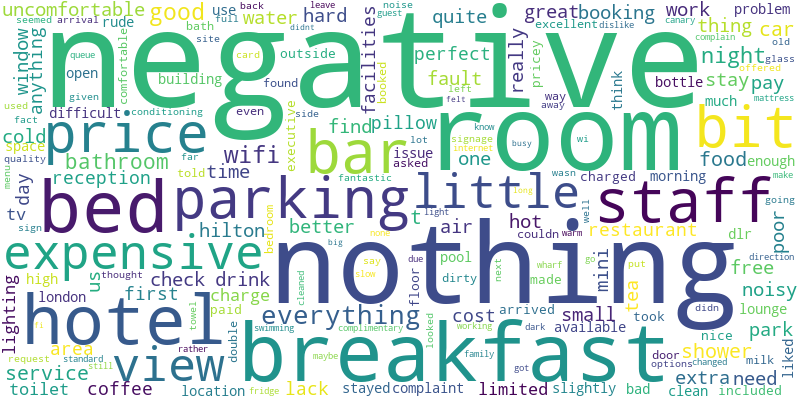

In [52]:
# Import the wordcloud library
import wordcloud

# Join the different processed titles together.
long_string = " ".join(top_nwords)

# Create a WordCloud object
wcloud = wordcloud.WordCloud(background_color='white', collocations = False, width=800, height=400)

# Generate a word cloud
wcloud.generate(long_string)

# Visualize the word cloud
wcloud.to_image()

# This part is for testing only

Wordcloud function

In [53]:
def wc(tive, column = None, value = None):
    if column == None and value == None:
        data = hotel.copy()       
    else:
        data = hotel[hotel[column] == value]
    corpus = data['stemed_clean_' + tive + '_review'].tolist()
    N_top = 5
    # store the high frequent words 
    top_nwords = []
    # check each report 
    for final_doc in corpus:
        c_doc = Counter(final_doc)
        # obtain top N_top words
        top_words = c_doc.most_common(N_top)
        # the first element in tuple is the word
        t_nwords = [w[0] for w in top_words]
        # concatenate the list, e.g., [a,b,c] + [d,a] = [a,b,c,d,a]
        top_nwords = top_nwords + t_nwords
    
    # Join the different processed titles together.
    long_string = " ".join(top_nwords)

    # Create a WordCloud object
    wcloud = wordcloud.WordCloud(background_color='white', width=800, height=400)

    # Generate a word cloud
    wcloud.generate(long_string)

    # Visualize the word cloud
    return wcloud.to_image()

We can use the above function to draw a word cloud with the following arguments (positive or negative review,column to filter,filter value). Examples below:

# Wordcloud with parts of speech (N,V, ADJ...) separated and could ignore words if required

In [54]:
tagged_final_corpus_positive = [nltk.pos_tag(i, tagset = 'universal') for i in final_corpus_positive]
tagged_final_corpus_negative = [nltk.pos_tag(i, tagset = 'universal') for i in final_corpus_negative]

In [55]:
tagged_final_corpus_positive[0:5]

[[('everything', 'NOUN')],
 [('bed', 'NOUN'),
  ('great', 'ADJ'),
  ('room', 'NOUN'),
  ('really', 'ADV'),
  ('clean', 'ADJ'),
  ('breakfast', 'NOUN'),
  ('excellent', 'NOUN')],
 [('staff', 'NOUN'),
  ('amazing', 'ADJ'),
  ('room', 'NOUN'),
  ('spacious', 'ADJ'),
  ('comfortable', 'ADJ'),
  ('food', 'NOUN'),
  ('great', 'ADJ'),
  ('three', 'NUM'),
  ('children', 'NOUN'),
  ('best', 'ADV'),
  ('stay', 'VERB')],
 [('expected', 'VERB'),
  ('standard', 'ADJ'),
  ('high', 'ADJ'),
  ('room', 'NOUN'),
  ('good', 'ADJ'),
  ('size', 'NOUN')],
 [('staff', 'NOUN'),
  ('exceptionally', 'ADV'),
  ('friendly', 'ADJ'),
  ('helpful', 'NOUN')]]

In [56]:
#pos list https://github.com/nltk/nltk/blob/develop/nltk/tag/mapping.py
#return a list of only the selected parts of speech
#Eg get_tag(tagged_final_corpus_positive,'NOUN',ignore = 'room')
def get_tag(tagged_list,pos = False ,ignore = False):
    if not pos:
        if not ignore:
            for i in range(len(tagged_list)):
                tagged_list[i] = [j[0] for j in tagged_list[i]]
        else:
            for i in range(len(tagged_list)):
                tagged_list[i] = [j[0] for j in tagged_list[i] if j[0] not in ignore]
    else:
        if not ignore:
            for i in range(len(tagged_list)):
                tagged_list[i] = [j[0] for j in tagged_list[i] if j[1] == pos]
        else:
            for i in range(len(tagged_list)):
                tagged_list[i] = [j[0] for j in tagged_list[i] if j[1] == pos and j[0] not in ignore]
    return [i for i in tagged_list if i != []]

In [57]:
#this is for convenience. For specific selection might be faster to select.
def wc(tive, column = None, value = None, pos = False, ignore = False):
    if column == None and value == None:
        data = hotel.copy()       
    else:
        data = hotel[hotel[column] == value]
    print(f'Sample size: {len(data)}') # Print out the sample size to get a sense of how many samples
    corpus = data['stemed_clean_' + tive + '_review'].tolist()
    corpus = [nltk.pos_tag(i, tagset = 'universal') for i in corpus]
    corpus = get_tag(corpus,pos = pos,ignore = ignore)
    N_top = 5
    # store the high frequent words 
    top_nwords = []
    # check each report 
    for final_doc in corpus:
        c_doc = Counter(final_doc)
        # obtain top N_top words
        top_words = c_doc.most_common(N_top)
        # the first element in tuple is the word
        t_nwords = [w[0] for w in top_words]
        # concatenate the list, e.g., [a,b,c] + [d,a] = [a,b,c,d,a]
        top_nwords = top_nwords + t_nwords
    
    # Join the different processed titles together.
    long_string = " ".join(top_nwords)

    # Create a WordCloud object
    wcloud = wordcloud.WordCloud(background_color='white', width=800, height=400)

    # Generate a word cloud
    wcloud.generate(long_string)

    # Visualize the word cloud
    return wcloud.to_image()

Sample size: 4493


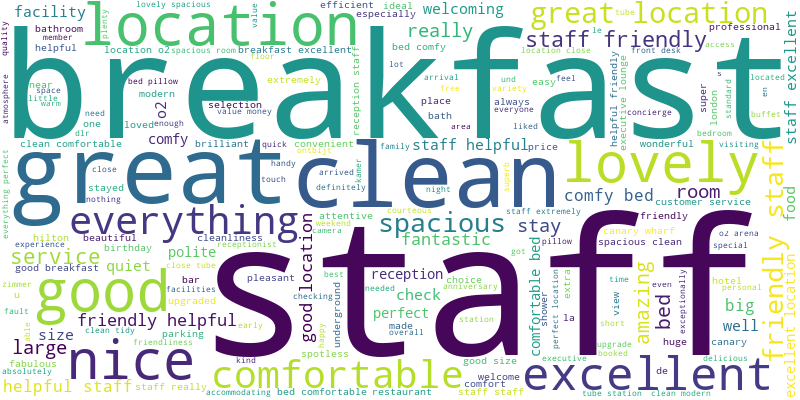

In [58]:
wc('positive', ignore = ['hotel', 'room', 'positive', 'negative'])

Sample size: 4493


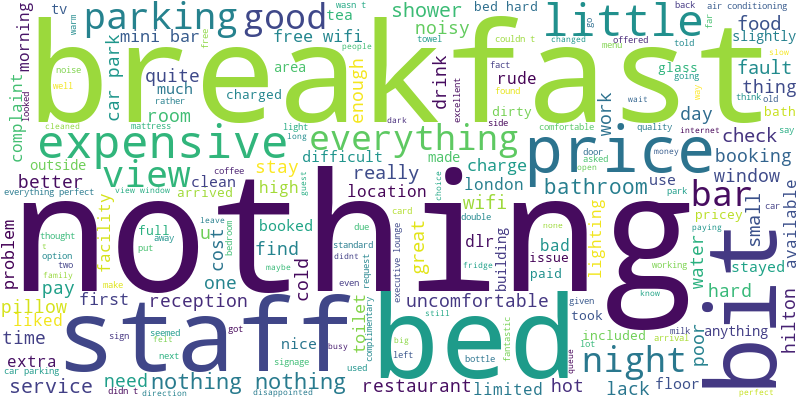

In [59]:
wc('negative', ignore = ['hotel', 'room', 'positive', 'negative'])

In [ ]:
# End